## Mise en forme des datasets

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [53]:
# chargement des dataset
df_2015 = pd.read_csv('Data/2015-building-energy-benchmarking.csv')
df_2016 = pd.read_csv('Data/2016-building-energy-benchmarking.csv')

In [54]:
df_2015.shape

(3340, 47)

In [55]:
df_2016.shape

(3376, 46)

In [56]:
df_2015.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

Les colonnes des datasets avec plus de 80% de valeurs manquantes sont supprimées

In [57]:
df_2015=df_2015.drop(df_2015.columns[df_2015.isna().mean(axis=0)>0.8], axis= 1)
df_2016=df_2016.drop(df_2016.columns[df_2016.isna().mean(axis=0)>0.8], axis= 1)

Premier nettoyage sur les features des 2 datasets

In [58]:
# Séparation du dictionnaire de la feature 'Location' du dataset df2015 en feature ['Latitude','Longitude','Address','City','State','ZipCode']

loc_df = df_2015['Location'].str.split(pat=",",expand=True)
loc_df[5]=loc_df[5].str.rstrip("}'}")
for col in loc_df.columns:
    loc_df[col]=loc_df.loc[:,col].str.split(pat=':',expand=True).iloc[:,-1]
    loc_df[col]=loc_df.loc[:,col].str.lstrip(" ")
    loc_df[col]=loc_df.loc[:,col].str.strip('"')
    loc_df[col]=loc_df.loc[:,col].str.strip("'")
loc_df.columns=['Latitude','Longitude','Address','City','State','ZipCode']
loc_df['City'] = loc_df['City'].str.capitalize()
loc_df['Address'] = loc_df['Address'].str.lower()
df_2015 = pd.concat([df_2015,loc_df],axis=1)

In [59]:
# Suppression des features inutiles
df_2015 = df_2015.drop(['Zip Codes','Location','Seattle Police Department Micro Community Policing Plan Areas','SPD Beats'],axis=1)

In [60]:
# Renommage des colonnes
df_2016=df_2016.rename(columns={'TotalGHGEmissions':'GHGEmissions(MetricTonsCO2e)','GHGEmissionsIntensity':'GHGEmissionsIntensity(kgCO2e/ft2)'})

In [61]:
# Fusion des 2 datasets
df = pd.concat([df_2016,df_2015])
df = df.reset_index(drop = True)

Les locaux intéressants pour notre étude sont les non-résidentiels. On supprime donc tous les locaux destinés àa la résidence

In [62]:
# Suppression des locaux résidentiels
df = df[df['BuildingType'].isin(['NonResidential', 'Nonresidential COS',
       'SPS-District K-12', 'Campus', 'Nonresidential WA'])]
df=df.drop(df[df['PrimaryPropertyType']=='Low-Rise Multifamily'].index)

In [63]:
# Suppression des features non utilisées
columns_to_drop = ['City', 'State', 'CouncilDistrictCode',
       'Electricity(kWh)','DefaultData', 'ComplianceStatus','SiteEnergyUseWN(kBtu)',
            'SourceEUIWN(kBtu/sf)','TaxParcelIdentificationNumber', 'Latitude', 'Longitude','NaturalGas(therms)','SiteEUIWN(kBtu/sf)', 'ZipCode']
df = df.drop(labels=columns_to_drop,axis=1)

In [64]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'Neighborhood', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'OtherFuelUse(kBtu)'],
      dtype='object')

In [65]:
df.describe()

,OSEBuildingID,DataYear,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),OtherFuelUse(kBtu)
count,3313.000000,3313.000000,3313.000000,3311.000000,3305.000000,3.313000e+03,3313.000000,3.313000e+03,3.242000e+03,1663.000000,2210.000000,3303.000000,3304.000000,3.304000e+03,3.304000e+03,3.304000e+03,3.304000e+03,3304.000000,3304.000000,1.641000e+03
mean,15941.554784,2015.502566,1961.568065,1.117487,4.127988,1.157668e+05,13312.487775,1.024543e+05,9.548537e+04,36206.199818,64.830769,71.656040,175.520278,8.077857e+06,4.941500e+05,5.642239e+06,1.879192e+06,177.279824,1.481535,1.429777e+04
std,13419.061496,0.500069,32.699577,2.221516,6.572212,2.512971e+05,43625.268374,2.342396e+05,2.275881e+05,68314.067916,28.547806,72.401282,180.848862,2.527253e+07,5.230598e+06,1.742143e+07,7.904055e+06,666.917750,2.215985,2.794086e+05
min,1.000000,2015.000000,1900.000000,0.000000,0.000000,1.128500e+04,-2.000000,-5.055000e+04,5.656000e+03,0.000000,1.000000,0.000000,-2.000000,0.000000e+00,0.000000e+00,-1.154170e+05,0.000000e+00,-0.800000,-0.020000,0.000000e+00
25%,578.000000,2015.000000,1930.000000,1.000000,1.000000,2.950800e+04,0.000000,2.850000e+04,2.552100e+04,5350.000000,47.000000,33.200001,76.300002,1.223996e+06,0.000000e+00,7.243368e+05,0.000000e+00,19.727500,0.270000,0.000000e+00
50%,21119.000000,2016.000000,1965.000000,1.000000,2.000000,4.924900e+04,0.000000,4.741500e+04,4.326800e+04,12208.000000,72.000000,51.700001,131.349998,2.508795e+06,0.000000e+00,1.621417e+06,4.815680e+05,49.180000,0.780000,0.000000e+00
75%,24547.000000,2016.000000,1989.000000,1.000000,4.000000,1.049000e+05,0.000000,9.447200e+04,9.000000e+04,31348.000000,89.000000,81.699997,204.899994,6.922040e+06,0.000000e+00,4.880607e+06,1.472630e+06,139.022500,1.760000,0.000000e+00
max,50226.000000,2016.000000,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,100.000000,834.400024,2620.000000,8.739237e+08,1.349435e+08,6.570744e+08,2.979090e+08,16870.980000,34.090000,8.269669e+06


## Nettoyage des aberrations et doublons

In [66]:
#Suppression des surfaces négatives
idx_to_drop=df[(df['PropertyGFABuilding(s)']<0)|(df['PropertyGFAParking']<0)].index
df=df.drop(idx_to_drop)

In [67]:
# Suppression du batiment à conso élec négative
idx_to_drop = df[df['Electricity(kBtu)']<0].index
df=df.drop(idx_to_drop)

In [68]:
# Suppression des batiments sans emissions
idx_to_drop = df[(df['SiteEnergyUse(kBtu)']==0)|(df['GHGEmissions(MetricTonsCO2e)']==0)].index
df=df.drop(idx_to_drop)

In [69]:
# Les doublons sont identifiés par l'ID de bâtiment. Si les valeurs cibles sont différentes de + de 30%, les 2 entrées sont gardées.
# Sinon, l'entrée de 2015 est gardée

df_duplicates = df[df.duplicated(subset = 'OSEBuildingID',keep=False)].sort_values('OSEBuildingID')
codes = []
energyuse_errors = []
emission_errors = []
for code in df_duplicates['OSEBuildingID'].unique():
    energyuse = df_duplicates[df_duplicates['OSEBuildingID']==code]['SiteEnergyUse(kBtu)']
    emission = df_duplicates[df_duplicates['OSEBuildingID']==code]['GHGEmissions(MetricTonsCO2e)']
    energyuse_error = (energyuse.max()-energyuse.min())/energyuse.min()
    emission_error = (emission.max()-emission.min())/emission.min()
    codes.append(code)
    energyuse_errors.append(energyuse_error)
    emission_errors.append(emission_error)
errors = pd.DataFrame({'energy_error':energyuse_errors,'emission_error':emission_errors}, index = codes)
codes_to_drop = errors[(errors['energy_error']<0.3)|(errors['emission_error']<0.3)].index
idx_to_drop = df[(df['DataYear']==2016)&df['OSEBuildingID'].isin(codes_to_drop)].index
df=df.drop(idx_to_drop)

La matrice de corrélation des features quantitatives est calculée

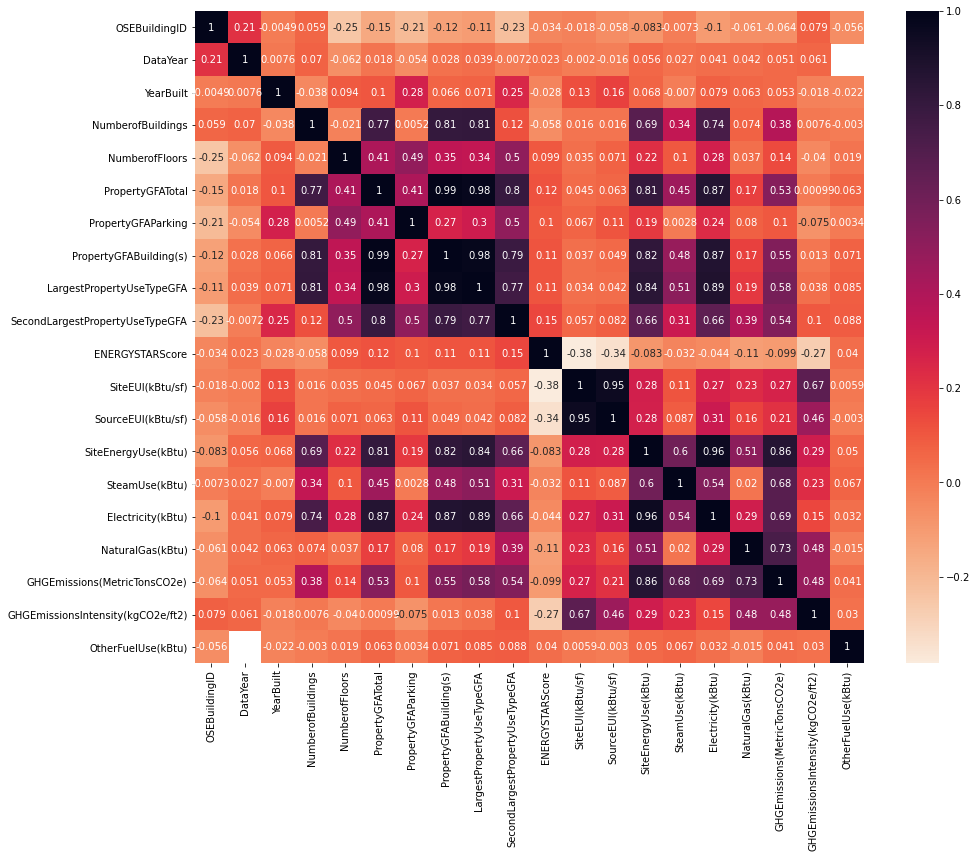

In [70]:
# Matrice de corrélation
mat_corr=df.corr('pearson')
plt.figure(figsize=(15,12))
sns.heatmap(mat_corr, annot=True, cmap = 'rocket_r');

In [71]:
# On supprime les variables corrélées
cor_columns = ['PropertyGFATotal','SourceEUI(kBtu/sf)']
df = df.drop(labels=cor_columns,axis=1)

In [72]:
df.shape

(1826, 26)

## Visualisation du contenu des données

In [74]:
# Renommage de certaines catégories
df['PrimaryPropertyType'].replace('Self-Storage Facility\n', "Self-Storage Facility", inplace = True)
df['PrimaryPropertyType'].replace('Distribution Center\n', "Distribution Center", inplace = True)
df['PrimaryPropertyType'].replace('Supermarket / Grocery Store', "Supermarket/Grocery Store", inplace = True)
df['PrimaryPropertyType'].replace('Restaurant\n', "Restaurant", inplace = True)

In [75]:
# Renommage des quartiers
df['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS', "DELRIDGE", inplace = True)
df['Neighborhood'] = df['Neighborhood'].str.capitalize()

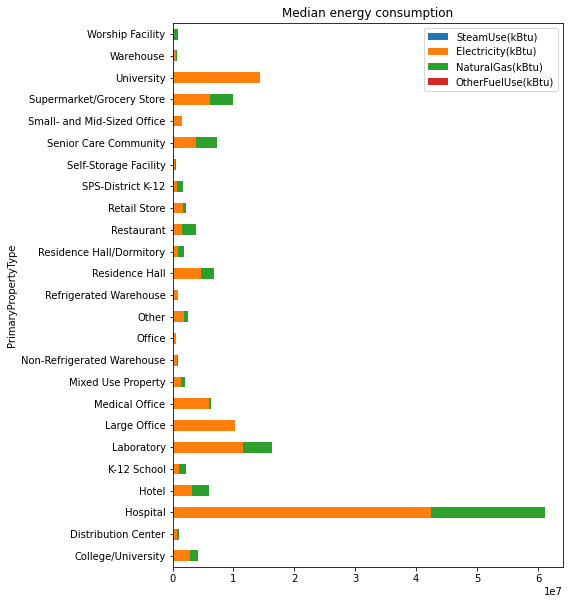

In [91]:
# Visualisation de la médiane de consommation d'énergie par type de bâtiments
data = df[['PrimaryPropertyType','SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)','OtherFuelUse(kBtu)']]
data = data.groupby(by='PrimaryPropertyType').median()
data.plot(kind='barh',stacked=True,figsize=(7,10), title = 'Median energy consumption');

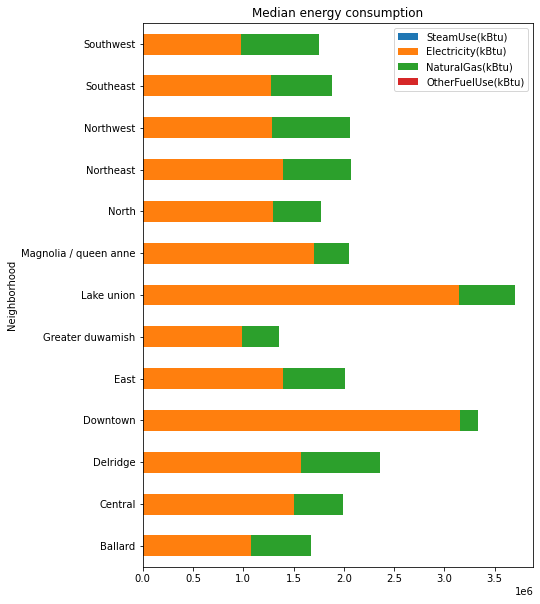

In [92]:
# Visualisation de la médiane de consommation d'énergie par quartier
data = df[['Neighborhood','SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)','OtherFuelUse(kBtu)']]
data = data.groupby(by='Neighborhood').median()
data.plot(kind='barh',stacked=True,figsize=(7,10), title = 'Median energy consumption');

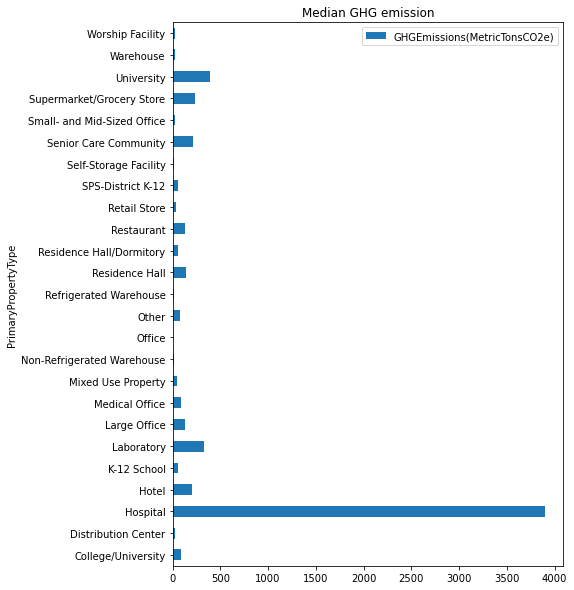

In [94]:
# Visualisation de la médiane de l'émission de GES par type de bâtiments
data = df[['PrimaryPropertyType','GHGEmissions(MetricTonsCO2e)']]
data = data.groupby(by='PrimaryPropertyType').median()
data.plot(kind='barh',figsize=(7,10), title = 'Median GHG emission');

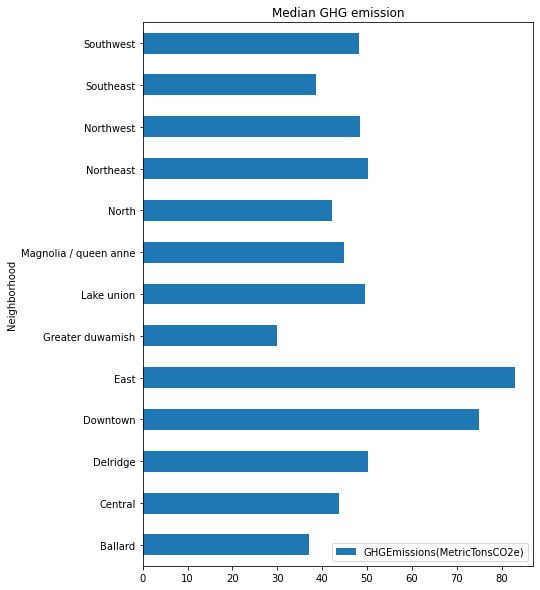

In [93]:
# Visualisation de la médiane de l'émission de GES par quartier
data = df[['Neighborhood','GHGEmissions(MetricTonsCO2e)']]
data = data.groupby(by='Neighborhood').median()
data.plot(kind='barh',figsize=(7,10), title = 'Median GHG emission');

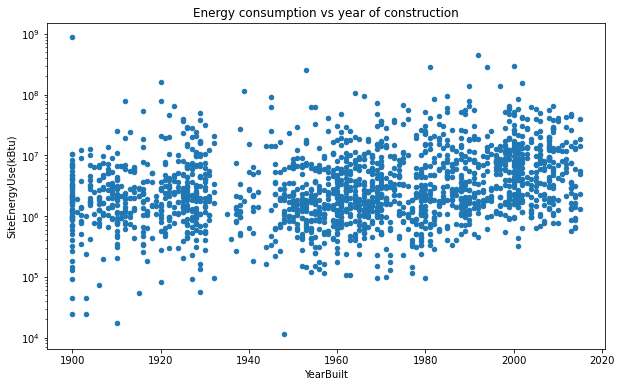

In [99]:
data = df[['YearBuilt','SiteEnergyUse(kBtu)']]
data.plot.scatter(figsize=(10,6),x='YearBuilt', y='SiteEnergyUse(kBtu)', logy = True, title = 'Energy consumption vs year of construction');

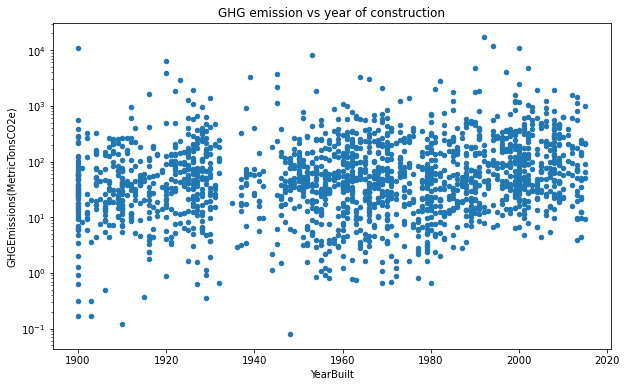

In [100]:
data = df[['YearBuilt','GHGEmissions(MetricTonsCO2e)']]
data.plot.scatter(figsize=(10,6),x='YearBuilt', y='GHGEmissions(MetricTonsCO2e)', logy = True, title = 'GHG emission vs year of construction');

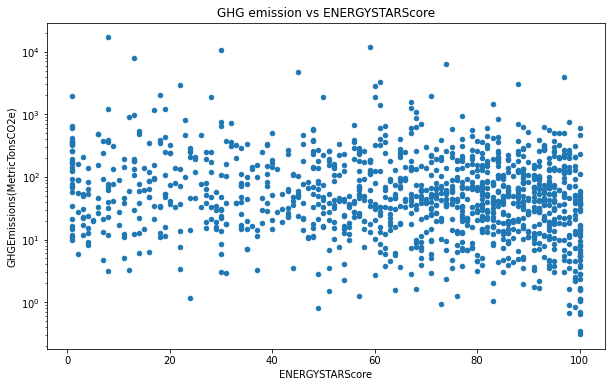

In [101]:
# Visualisation du nuage de points EnergyStarScore vs Emission GES
data=df[['ENERGYSTARScore','GHGEmissions(MetricTonsCO2e)']]
data.plot.scatter(figsize=(10,6),x='ENERGYSTARScore', y='GHGEmissions(MetricTonsCO2e)', logy = True, title = 'GHG emission vs ENERGYSTARScore');

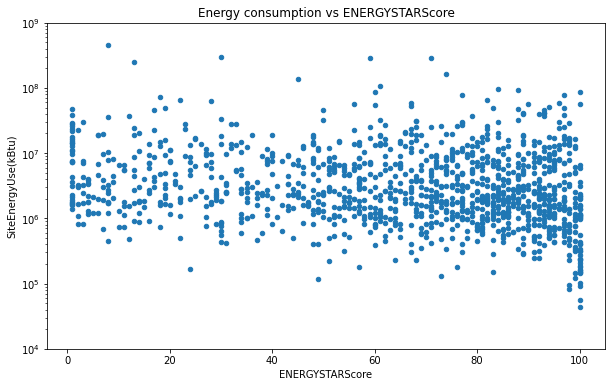

In [102]:
# Visualisation du nuage de points EnergyStarScore vs Conso energie
data=df[['ENERGYSTARScore','SiteEnergyUse(kBtu)']]
data.plot.scatter(figsize=(10,6),x='ENERGYSTARScore', y='SiteEnergyUse(kBtu)', logy = True, ylim=(10000,1000000000), title = 'Energy consumption vs ENERGYSTARScore');

In [28]:
# Enregistrement du dataset cleané
df.to_csv(r'C:\Users\BENAVEN\Desktop\Stevan\Formation OCR\Projet 4 - Anticipez les besoins en consommation\df_clean.csv')

## Pré-traitement en vue de la modélisation

In [29]:
# Suppression des features qui ne seront pas utilisées
columns_to_drop=['OSEBuildingID','BuildingType','PropertyName', 'Address','SiteEUI(kBtu/sf)','GHGEmissionsIntensity(kgCO2e/ft2)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)','OtherFuelUse(kBtu)','DataYear']
df_for_model = df.drop(columns_to_drop,axis=1)
df_for_model = df_for_model.dropna(subset=['NumberofFloors','SiteEnergyUse(kBtu)','GHGEmissions(MetricTonsCO2e)'])

In [30]:
# Médiane de la conso d'énergie par type de bâtiments
data = df[['PrimaryPropertyType','SiteEnergyUse(kBtu)']]
data = data.groupby(by='PrimaryPropertyType', as_index=False).median().sort_values(by='SiteEnergyUse(kBtu)')

In [31]:
# Médiane de l'émission de GES par type de bâtiments
data_bis = df[['PrimaryPropertyType','GHGEmissions(MetricTonsCO2e)']]
data_bis = data_bis.groupby(by='PrimaryPropertyType', as_index=False).median().sort_values(by='GHGEmissions(MetricTonsCO2e)')

In [32]:
# Jointure de ces médianes au dataset principal
df_for_model=df_for_model.merge(data, how='outer',on='PrimaryPropertyType').rename(columns={'SiteEnergyUse(kBtu)_x':'SiteEnergyUse(kBtu)','SiteEnergyUse(kBtu)_y':'MedianEnergyUse'})
df_for_model=df_for_model.merge(data_bis, how='outer',on='PrimaryPropertyType').rename(columns={'GHGEmissions(MetricTonsCO2e)_x':'GHGEmissions(MetricTonsCO2e)','GHGEmissions(MetricTonsCO2e)_y':'MedianGHGEmission'})

In [33]:
df_for_model

,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),MedianEnergyUse,MedianGHGEmission
0,Hotel,Downtown,1926,1.0,10.0,0,61320,Hotel,Hotel,61320.0,NaN,NaN,56.0,6794584.00,286.43,6487864.0,208.135
1,Hotel,Downtown,1910,1.0,8.0,0,61721,Hotel,NaN,NaN,NaN,NaN,93.0,2897079.75,36.92,6487864.0,208.135
2,Hotel,East,1928,1.0,9.0,0,48006,Hotel,Hotel,48006.0,NaN,NaN,85.0,3239754.00,101.31,6487864.0,208.135
3,Hotel,Downtown,2015,1.0,14.0,0,144614,Hotel,Hotel,159500.0,NaN,NaN,89.0,5525072.50,50.32,6487864.0,208.135
4,Hotel,Lake union,2014,1.0,4.0,41539,85284,"Hotel, Parking, Swimming Pool",Hotel,88157.0,Parking,41539.0,72.0,6042399.50,131.02,6487864.0,208.135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1806,Non-Refrigerated Warehouse,Southeast,1988,1.0,2.0,0,45700,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,293707.0,NaN,NaN,99.0,1507270.00,13.43,1189402.0,18.440
1807,SPS-District K-12,Lake union,1997,1.0,4.0,0,241066,NaN,NaN,NaN,NaN,NaN,74.0,7870351.00,263.53,1537184.0,54.005
1808,SPS-District K-12,Southeast,1925,1.0,1.0,0,33105,NaN,NaN,NaN,NaN,NaN,79.0,1739013.00,72.03,1537184.0,54.005
1809,SPS-District K-12,Southeast,1961,1.0,1.0,0,41428,NaN,NaN,NaN,NaN,NaN,94.0,1223425.00,35.98,1537184.0,54.005


In [34]:
# Renommage des utilisations avant traitement

df_for_model['ListOfAllPropertyUseTypes'].replace('Personal Services (Health/Beauty, Dry Cleaning, etc)', "Personal Services (Health/Beauty; Dry Cleaning; etc)", inplace = True)
df_for_model['ListOfAllPropertyUseTypes'].replace('Other - Mall, Personal Services (Health/Beauty, Dry Cleaning, etc)', "Other - Mall, Personal Services (Health/Beauty; Dry Cleaning; etc)", inplace = True)
df_for_model['ListOfAllPropertyUseTypes'].replace('Repair Services (Vehicle, Shoe, Locksmith, etc)', "Repair Services (Vehicle; Shoe; Locksmith; etc)", inplace = True)
df_for_model['ListOfAllPropertyUseTypes'].replace('Office, Repair Services (Vehicle, Shoe, Locksmith, etc)', "Office, Repair Services (Vehicle; Shoe; Locksmith; etc)", inplace = True)
df_for_model['ListOfAllPropertyUseTypes'].replace('Bar/Nightclub, Office, Personal Services (Health/Beauty, Dry Cleaning, etc)', 'Bar/Nightclub, Office, Personal Services (Health/Beauty; Dry Cleaning; etc)', inplace = True)

df_for_model['ListOfAllPropertyUseTypes'].replace('Other, Personal Services (Health/Beauty, Dry Cleaning, etc), Restaurant, Retail Store', "Other, Personal Services (Health/Beauty; Dry Cleaning; etc), Restaurant, Retail Store", inplace = True)
df_for_model['ListOfAllPropertyUseTypes'].replace('Office, Repair Services (Vehicle, Shoe, Locksmith, etc), Retail Store', "Office, Repair Services (Vehicle; Shoe; Locksmith; etc), Retail Store", inplace = True)
df_for_model['ListOfAllPropertyUseTypes'].replace('Office, Other - Public Services, Personal Services (Health/Beauty, Dry Cleaning, etc), Senior Care Community', "Office, Other - Public Services, Personal Services (Health/Beauty; Dry Cleaning; etc), Senior Care Community", inplace = True)
df_for_model['ListOfAllPropertyUseTypes'].replace('Non-Refrigerated Warehouse, Office, Repair Services (Vehicle, Shoe, Locksmith, etc)', "Non-Refrigerated Warehouse, Office, Repair Services (Vehicle; Shoe; Locksmith; etc)", inplace = True)

df_for_model['ListOfAllPropertyUseTypes'].replace('Multifamily Housing, Parking, Personal Services (Health/Beauty, Dry Cleaning, etc), Retail Store, Supermarket/Grocery Store', 
                                                  'Multifamily Housing, Parking, Personal Services (Health/Beauty; Dry Cleaning; etc), Retail Store, Supermarket/Grocery Store', inplace = True)
df_for_model['ListOfAllPropertyUseTypes'].replace('Non-Refrigerated Warehouse, Parking, Repair Services (Vehicle, Shoe, Locksmith, etc), Retail Store', 
                                                  'Non-Refrigerated Warehouse, Parking, Repair Services (Vehicle; Shoe; Locksmith; etc), Retail Store', inplace = True)

df_for_model['ListOfAllPropertyUseTypes'].replace('Data Center, Non-Refrigerated Warehouse, Other, Refrigerated Warehouse, Repair Services (Vehicle, Shoe, Locksmith, etc), Restaurant', 
                                                  'Data Center, Non-Refrigerated Warehouse, Other, Refrigerated Warehouse, Repair Services (Vehicle; Shoe; Locksmith; etc), Restaurant', inplace = True)

df_for_model['ListOfAllPropertyUseTypes'].replace('Convenience Store without Gas Station, Data Center, Financial Office, Fitness Center/Health Club/Gym, Office, Other, Parking, Personal Services (Health/Beauty, Dry Cleaning, etc), Restaurant', 
                                                  'Convenience Store without Gas Station, Data Center, Financial Office, Fitness Center/Health Club/Gym, Office, Other, Parking, Personal Services (Health/Beauty; Dry Cleaning; etc), Restaurant', inplace = True)

In [36]:
# Ajout de la feature 'nombre d'utilisations'
df_for_model['NumberofUseTypes'] = df_for_model['ListOfAllPropertyUseTypes'].str.split(',').str.len()

In [37]:
# Remplissage des valeurs manquantes de certaines features 
df_for_model['ListOfAllPropertyUseTypes'] = df_for_model['ListOfAllPropertyUseTypes'].fillna(df_for_model['PrimaryPropertyType'])
df_for_model['LargestPropertyUseType'] = df_for_model['LargestPropertyUseType'].fillna(df_for_model['PrimaryPropertyType'])
df_for_model['LargestPropertyUseTypeGFA'] = df_for_model['LargestPropertyUseTypeGFA'].fillna(df_for_model['PropertyGFABuilding(s)']+df_for_model['PropertyGFAParking'])
df_for_model['SecondLargestPropertyUseType'] = df_for_model['SecondLargestPropertyUseType'].where((df_for_model['SecondLargestPropertyUseType']!='NaN')&(df_for_model['NumberofUseTypes']!=1),other = 'No type')
df_for_model['SecondLargestPropertyUseType'] = df_for_model['SecondLargestPropertyUseType'].where(df_for_model['SecondLargestPropertyUseType'].notna(),other='Parking')
df_for_model['SecondLargestPropertyUseTypeGFA'] = df_for_model['SecondLargestPropertyUseTypeGFA'].where(df_for_model['SecondLargestPropertyUseTypeGFA'].notna(),other = 0)

In [38]:
# Encodage de la liste des types d'utilisation
lists = []
for i in range(len(df_for_model)) :
    lists.append(df_for_model['ListOfAllPropertyUseTypes'][i].split(', '))
flat_list = [item for sublist in lists for item in sublist]
flat_list = list(set(flat_list))

df_use_type=pd.DataFrame(columns = flat_list)
for column in df_use_type.columns:
    for idx in range(len(lists)):
        df_use_type.loc[idx,column] = np.where(column in lists[idx],1,0)

In [39]:
# Jointure de l'encodage précédent au dataset principal
df_for_model = df_for_model.join(df_use_type)

In [40]:
# Transformation des cibles
df_for_model['SiteEnergyUse(kBtu)_log'] = np.log1p(df_for_model['SiteEnergyUse(kBtu)'])
df_for_model['GHGEmissions(MetricTonsCO2e)_log'] = np.log1p(df_for_model['GHGEmissions(MetricTonsCO2e)'])

In [41]:
df_for_model

,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,...,Urgent Care/Clinic/Other Outpatient,Self-Storage Facility,Adult Education,Enclosed Mall,Large Office,SPS-District K-12,Bar/Nightclub,Personal Services (Health/Beauty; Dry Cleaning; etc),SiteEnergyUse(kBtu)_log,GHGEmissions(MetricTonsCO2e)_log
0,Hotel,Downtown,1926,1.0,10.0,0,61320,Hotel,Hotel,61320.0,...,0,0,0,0,0,0,0,0,15.731637,5.660979
1,Hotel,Downtown,1910,1.0,8.0,0,61721,Hotel,Hotel,61721.0,...,0,0,0,0,0,0,0,0,14.879214,3.635479
2,Hotel,East,1928,1.0,9.0,0,48006,Hotel,Hotel,48006.0,...,0,0,0,0,0,0,0,0,14.991008,4.628007
3,Hotel,Downtown,2015,1.0,14.0,0,144614,Hotel,Hotel,159500.0,...,0,0,0,0,0,0,0,0,15.524807,3.938081
4,Hotel,Lake union,2014,1.0,4.0,41539,85284,"Hotel, Parking, Swimming Pool",Hotel,88157.0,...,0,0,0,0,0,0,0,0,15.614312,4.882953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1806,Non-Refrigerated Warehouse,Southeast,1988,1.0,2.0,0,45700,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,293707.0,...,0,0,0,0,0,0,0,0,14.225811,2.669309
1807,SPS-District K-12,Lake union,1997,1.0,4.0,0,241066,SPS-District K-12,SPS-District K-12,241066.0,...,0,0,0,0,0,1,0,0,15.878613,5.577955
1808,SPS-District K-12,Southeast,1925,1.0,1.0,0,33105,SPS-District K-12,SPS-District K-12,33105.0,...,0,0,0,0,0,1,0,0,14.368829,4.290870
1809,SPS-District K-12,Southeast,1961,1.0,1.0,0,41428,SPS-District K-12,SPS-District K-12,41428.0,...,0,0,0,0,0,1,0,0,14.017166,3.610377


In [73]:
df_for_model.shape

(1811, 92)

In [42]:
# Enregistrement du dataset pré-traité
df_for_model.to_csv(r'C:\Users\BENAVEN\Desktop\Stevan\Formation OCR\Projet 4 - Anticipez les besoins en consommation\df_for_model.csv')